# 前言

缺失值（类型）：

- 完全随机缺失（missing completely at random，MCAR）：指的是数据的缺失是随机的，数据的缺失不依赖于任何不完全变量或完全变量。空值的出现与数据集中已知或者未知的特征是完全无关的（没有任何已知特征与其相关，类似自然选择无筛选条件）。比如：一调查问卷中的性别字段，是否缺失属于完全随机，它取决于调查对象。
- 随机缺失 (missing at random,MAR)：指的是数据的缺失不是完全随机的，即该类数据的缺失依赖于其他完全变量。比如：一个关于教育的数据集缺失了很多小孩的IQ测试分数，只是因为相比十二岁的孩子，四岁的孩子很少会通过这个测试。所以出现的空值与IQ实际值没有相关性，而与年龄相关。IQ字段缺失记录主要集中在低年龄人群中！
- 非随机缺失 (missing not at random,MNAR)：指的是数据的缺失依赖于不完全变量自身。 比如：只有具有低分个体的IQ变量值缺失。

前两种情况下，根据出现的情况删除含有缺失值的数据是安全的，而在第三种情况下，删除含有缺失值的观测值可能会在模型中产生偏差。

# 缺失值的识别

In [1]:
import pandas as pd 
import numpy as np

In [11]:
df = pd.DataFrame(np.random.randn(6,4),index=list('ABCDEF'),columns=['one','two','three','four'])
df.iloc[2,:-2] = np.nan
df.iloc[2:-1,2] = np.nan
print("带有缺失值的数据")
print(df)
"""------------缺失值的识别----------------"""
print("对整个数据表进行识别")
print(df.isnull())
print("判断哪些列存在缺失值")
print(df.isnull().any())
print("展示数据缺失值的位置，用True表示")
print(df.isnull().values==True)

带有缺失值的数据
        one       two     three      four
A -1.755212  0.296064 -0.072823 -1.252411
B  1.523137 -0.445252  0.791023 -0.434625
C       NaN       NaN       NaN -0.075022
D  0.540466  0.734528       NaN  1.598347
E  0.294629 -0.252511       NaN  0.813611
F  0.724350 -0.437479  0.214818  0.788320
对整个数据表进行识别
     one    two  three   four
A  False  False  False  False
B  False  False  False  False
C   True   True   True  False
D  False  False   True  False
E  False  False   True  False
F  False  False  False  False
判断哪些列存在缺失值
one       True
two       True
three     True
four     False
dtype: bool
展示数据缺失值的位置，用True表示
[[False False False False]
 [False False False False]
 [ True  True  True False]
 [False False  True False]
 [False False  True False]
 [False False False False]]


# 删除缺失值

80%法则 (Bijlsma et al. 2006)认为，当某一物质的非缺失部分低于总样本量的80%时，建议删除该物质。Modified 80%法则认为， 当某一物质的非缺失部分低于所有生物学亚组的80%时，建议删除该物质。

In [13]:
"""------------删除缺失值----------------"""
df = pd.DataFrame(np.random.randn(6,4),index=list('ABCDEF'),columns=['one','two','three','four'])
df.iloc[2,:-2] = np.nan
df.iloc[2:-1,2] = np.nan
print("删除有缺失值的行")
print(df.dropna(axis=0))

print("只有行里的数据全部为空时才删除")
print(df.dropna(how='all'))

print("删除有缺失值的列")
print(df.dropna(axis=1))

print("只有列里的数据全部为空时才删除")
print(df.dropna(how='all',axis=1))

删除有缺失值的行
        one       two     three      four
A  0.370368 -1.137125  0.481571  0.645958
B  0.086334 -0.740657  0.624970 -1.774424
F -1.026114  1.343027 -0.943506  1.435659
只有行里的数据全部为空时才删除
        one       two     three      four
A  0.370368 -1.137125  0.481571  0.645958
B  0.086334 -0.740657  0.624970 -1.774424
C       NaN       NaN       NaN  0.773868
D -0.112797 -0.637683       NaN -0.675264
E -0.530505 -1.718158       NaN  1.238525
F -1.026114  1.343027 -0.943506  1.435659
删除有缺失值的列
       four
A  0.645958
B -1.774424
C  0.773868
D -0.675264
E  1.238525
F  1.435659
只有列里的数据全部为空时才删除
        one       two     three      four
A  0.370368 -1.137125  0.481571  0.645958
B  0.086334 -0.740657  0.624970 -1.774424
C       NaN       NaN       NaN  0.773868
D -0.112797 -0.637683       NaN -0.675264
E -0.530505 -1.718158       NaN  1.238525
F -1.026114  1.343027 -0.943506  1.435659


# 数据填充

- 使用一个自定义值进行填充
- 使用相邻的数据进行填充
- 使用一个字符串进行填充
- 使用统计数进行填充（如：平均数，中位数，众数）
- 使用插值法进行填充

In [12]:
"""------------填充数据----------------"""
print("DataFrame.fillna()填充数据")
print("使用固定值代替缺失值")
print(df.fillna(3))

print("使用字符串替换缺失值")
print(df.fillna('default'))

print("用前一个数替换缺失值")
print(df.fillna(method='pad'))

print("用后一个数替换缺失值")
print(df.fillna(method='bfill',limit=1))

print("用统计数替换缺失值，如平均数")
print(df.fillna(df.mean()))#用每一列的均值填充

print("还可以指定列来，替换缺失值")
print(df.fillna(df.mean()['one':'three']))

print("用统计数替换缺失值，如中位数")
print(df.fillna(df.median()))#用每一列的中位数填充

print("插值法填补缺失值")
print(df.interpolate())

DataFrame.fillna()填充数据
使用固定值代替缺失值
        one       two     three      four
A -1.755212  0.296064 -0.072823 -1.252411
B  1.523137 -0.445252  0.791023 -0.434625
C  3.000000  3.000000  3.000000 -0.075022
D  0.540466  0.734528  3.000000  1.598347
E  0.294629 -0.252511  3.000000  0.813611
F  0.724350 -0.437479  0.214818  0.788320
使用字符串替换缺失值
        one       two     three      four
A -1.755212  0.296064 -0.072823 -1.252411
B  1.523137 -0.445252  0.791023 -0.434625
C   default   default   default -0.075022
D  0.540466  0.734528   default  1.598347
E  0.294629 -0.252511   default  0.813611
F   0.72435 -0.437479  0.214818  0.788320
用前一个数替换缺失值
        one       two     three      four
A -1.755212  0.296064 -0.072823 -1.252411
B  1.523137 -0.445252  0.791023 -0.434625
C  1.523137 -0.445252  0.791023 -0.075022
D  0.540466  0.734528  0.791023  1.598347
E  0.294629 -0.252511  0.791023  0.813611
F  0.724350 -0.437479  0.214818  0.788320
用后一个数替换缺失值
        one       two     three      four
A -1.7552

# 基于KNN算法的数值插补

通过距离测量来识别数据集中空间相似或相近的 k个样本。然后，使用这些 k 样本来估计缺失数据点的值。每个样本的缺失值使用数据集中找到的 k 邻域的平均值进行插补。

## 含有缺失值的欧几里得距离的计算

在存在缺失坐标的情况下，通过忽略缺失值并放大非缺失坐标的权重来计算欧几里德距离。

In [1]:
# 基于sklearn.metrics.pairwise的计算
import numpy as np
from sklearn.metrics.pairwise import nan_euclidean_distances
x = [[3, np.nan, 5]]
y = [[1, 0, 0]]
nan_euclidean_distances(x, y)

array([[6.59545298]])

In [2]:
x = [[3, np.nan, 5], [1, 0, 0]]
nan_euclidean_distances(x, x)

array([[0.        , 6.59545298],
       [6.59545298, 0.        ]])

## 基于KNNImputer插补方法

基本思想：KNNImputer通过欧几里德距离矩阵寻找最近邻样本，使用最近邻样本的对应位置的非空数值的均值填补缺失的数值。

In [3]:
from sklearn.impute import KNNImputer
import numpy as np

X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
np.array(X)

nan_euclidean_distances(X, X)

array([[ 0.        ,  3.46410162,  6.92820323, 11.29158979],
       [ 3.46410162,  0.        ,  3.46410162,  7.54983444],
       [ 6.92820323,  3.46410162,  0.        ,  3.46410162],
       [11.29158979,  7.54983444,  3.46410162,  0.        ]])

In [4]:
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

# 回归填充

回归方程填充法，是选择若干能预测缺失值的自变量，通过建立回归方程估算缺失值。该方法能尽可能地利用原数据集中的信息，但也存在一些不足之处：1. 虽然这是一个无偏估计，但会忽视随机误差，低估标准差和其他未知性质的测量值。2.使用前，必须假设存在缺失值所在的变量与其他变量是存在线性关系的,但现实它们不一定存在这样的线性关系，这可以借助统计工具来辨析，但往往更需要建模人员的实践经验和业务知识来进行分析和判断。

所有的回归方法均可使用此步骤。如线性回归、随机森林回归、svm回归等。

## 方法步骤

a. 确定填充缺失值的变量（特征列）  

b. 拆分原始数据集：
根据需要充填缺失值的变量，把原始数据集拆分为2个子集（1. 不含有缺失值：dataset_train; 2. 只含有缺失值dataset_pred)

c. 辨析并检验相关变量的相关性：
经验分析判定与充填缺失值的变量相关的属性列有哪些，应用统计分析工具，在dataset_train数据集上查看验证所选择的属性列之间的相关性。

d. 建模并预测：
使用dataset_train数据集建立线性回归模型，并应用建好的模型对dataset_pred数据集中的缺失变量进行预测估计

e. 合并还原数据集：
将两个子集合并还原为一个数据集，为后续建模准备好数据。

**那如果数据中除了特征T之外，其他特征也有缺失值怎么办？**

答案是遍历所有的特征，从缺失最少的开始进行填补（因为填补缺失最少的特征所需要的准确信息最少）。填补一个特征时，先将其他特征的缺失值用0代替，每完成一次回归预测，就将预测值放到原本的特征矩阵中，再继续填补下一个特征。每一次填补完毕，有缺失值的特征会减少一个，所以每次循环后，需要用0来填补的特征就越来越少。当进行到最后一个特征时（这个特征应该是所有特征中缺失值最多的），已经没有任何的其他特征需要用0来进行填补了，而我们已经使用回归为其他特征填补了大量有效信息，可以用来填补缺失最多的特征。遍历所有的特征后，数据就完整，不再有缺失值了。

## 应用实例

In [9]:
# 创建一个学生信息集，属性列ID、Weight和Height
 
import pandas as pd
import numpy as np
# 学生数据集
sInfo = pd.DataFrame({"ID":["001","002","003","004","005","006","007"],
                      "Weight":['60','70','55','57','80','78','90'],
                      "Height":[np.nan, '175', '180', '167', np.nan,'169','185']})
print(sInfo)
# 删除缺失值行
sInfonew = sInfo.dropna(axis=0,how="any")
print(sInfonew)
 
# 建立回归模型做数据填充
from sklearn.linear_model import LinearRegression # 线性回归模型

model = LinearRegression()
model.fit(sInfonew["Weight"].values.reshape(-1,1), sInfonew["Height"].values.reshape(-1,1)) # 模型训练
 
# 假设已知体重55kg，身高未知
result = model.predict([[55]])
print(result)
 
result2 = model.predict([[60]])
print(result2)

    ID Weight Height
0  001     60    NaN
1  002     70    175
2  003     55    180
3  004     57    167
4  005     80    NaN
5  006     78    169
6  007     90    185
    ID Weight Height
1  002     70    175
2  003     55    180
3  004     57    167
5  006     78    169
6  007     90    185
[[172.03566434]]
[[173.09044289]]


# 插值函数

scipy.interpolate 模块有一维插值函数(interp1d)、二位插值函数(interp2d)、多为插值函数(interpn、interpnd)。

内插法和外插法的区别：是处理方法不同、职责不同、工作内容不同，核心区别就是：内插法在样本数据的范围内预测，比外插法要准。用回归方程预测范围以外的数值称为外插法，而内插法是对数据范围内的点进行预测。

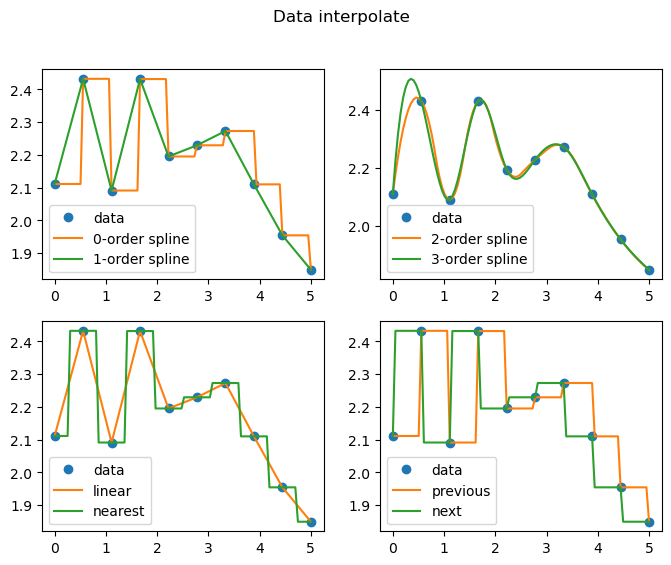

In [2]:
#一维插值方法(内插)比较
import numpy as np
import matplotlib.pyplot as plt  # 导入 Matplotlib 工具包
from scipy.interpolate import interp1d  # 导入 scipy 中的一维插值工具 interp1d

# 生成已知数据点集 (x,y)，需插值的数据点集 xnew
np.random.seed(5)
x = np.linspace(0, 5, 10)  # 生成已知数据点集的 x
y = np.cos(x/10)*2 + 0.5*np.random.rand(10)  # 生成已知数据点集的 y
xnew = np.linspace(0, 5, 100)  # 指定需插值的数据点集 xnew

# 使用不同插值方法，由给定数据点集 (x,y) 求插值函数 fx
f1 = interp1d(x, y, kind="linear")  # 线性插值
f2 = interp1d(x, y, kind="zero")  # 零阶样条插值
f3 = interp1d(x, y, kind="slinear")  # 一次样条插值
f4 = interp1d(x, y, kind="quadratic")  # 二次样条插值
f5 = interp1d(x, y, kind="cubic")  # 三次样条插值
f6 = interp1d(x, y, kind="nearest")  # 临近点插值，向下舍入
# f7 = interp1d(x, y, kind="nearest-up")  # 临近点插值，向上舍入
f8 = interp1d(x, y, kind="previous")  # 前点插值
f9 = interp1d(x, y, kind="next")  # 后点插值

# 绘图
plt.figure(figsize=(8,6))
plt.suptitle("Data interpolate")  # 全局标题
plt.subplot(221)
plt.plot(x, y, "o",  label="data")  # 已知数据点
plt.plot(xnew, f2(xnew), label="0-order spline")  # 零阶样条插值
plt.plot(xnew, f3(xnew), label="1-order spline")  # 一阶样条插值
plt.legend(loc="lower left")
plt.subplot(222)
plt.plot(x, y, "o",  label="data")  # 已知数据点
plt.plot(xnew, f4(xnew), label="2-order spline")  # 二阶样条插值
plt.plot(xnew, f5(xnew), label="3-order spline")  # 三阶样条插值
plt.legend(loc="lower left")
plt.subplot(223)
plt.plot(x, y, "o",  label="data")  # 已知数据点
plt.plot(xnew, f1(xnew), label="linear")  # 线性插值
plt.plot(xnew, f6(xnew), label="nearest")  # 临近点插值，向下舍入
# plt.plot(xnew, f7(xnew), label="nearest-up")  # 临近点插值，向上舍入
plt.legend(loc="lower left")
plt.subplot(224)
plt.plot(x, y, "o",  label="data")  # 已知数据点
plt.plot(xnew, f8(xnew), label="previous")  # 前点插值
plt.plot(xnew, f9(xnew), label="next")  # 后点插值
plt.legend(loc="lower left")
plt.show()

## 线性插值

In [17]:
def irp(data):
    input_varlen = len(data.columns)
    #转为Pandas
    dfs = data.values
    nan_sum = np.isnan(dfs).sum(axis=0)
    ir_data = []
    for i in range(input_varlen):
        #选择缺失列
        if nan_sum[i] > 0:
            filter_data = dfs[:, i]
            #定义纵坐标，删除缺失值
            y = filter_data[np.where(np.isnan(filter_data) != 1)]
            #定义横坐标，没有缺失值的索引
            x0 = np.array(range(len(filter_data)))
            x = x0[np.where(np.isnan(filter_data) != 1)]
            #构造拟合函数
            irf = scipy.interpolate.interp1d(x, y, kind = 'linear', fill_value="extrapolate")
            #获取缺失值的索引，方便进行插值
            x_new = x0[np.where(np.isnan(filter_data) == 1)]
            #拟合缺失数据
            y_new = irf(x_new)
            filter_data[x_new] = y_new 
            #数据合并
            ir_data.append(filter_data)
        else:
            filter_data = dfs[:, i]
            #数据合并
            ir_data.append(filter_data)
    df = np.array(ir_data).T
    data = pd.DataFrame(data=df, columns=data.columns)
    return data

In [18]:
data = pd.DataFrame([(1, 55, 23), (2, 66, np.nan), (3, 60, 34), (4, np.nan, 35)],
                    columns=['id', 'name', 'age'])

In [19]:
import scipy
irp(data)

,id,name,age
0,1.0,55.0,23.0
1,2.0,66.0,28.5
2,3.0,60.0,34.0
3,4.0,54.0,35.0


In [ ]:
filter_data = dfs[:, ""]
#定义纵坐标，删除缺失值
y = filter_data[np.where(np.isnan(filter_data) != 1)]
#定义横坐标，没有缺失值的索引
x0 = np.array(range(len(filter_data)))
x = x0[np.where(np.isnan(filter_data) != 1)]
#构造拟合函数
irf = scipy.interpolate.interp1d(x, y, kind = 'linear', fill_value="extrapolate")
#获取缺失值的索引，方便进行插值
x_new = x0[np.where(np.isnan(filter_data) == 1)]
#拟合缺失数据
y_new = irf(x_new)
filter_data[x_new] = y_new 